# Introduction

Here I'm making figures for the paper

In [150]:
import numpy as np
import csv as csv
import pandas as pd
import matplotlib.pyplot as plt
import funcs as f
import pickle,copy,time,random
%matplotlib inline

### Stationary densities

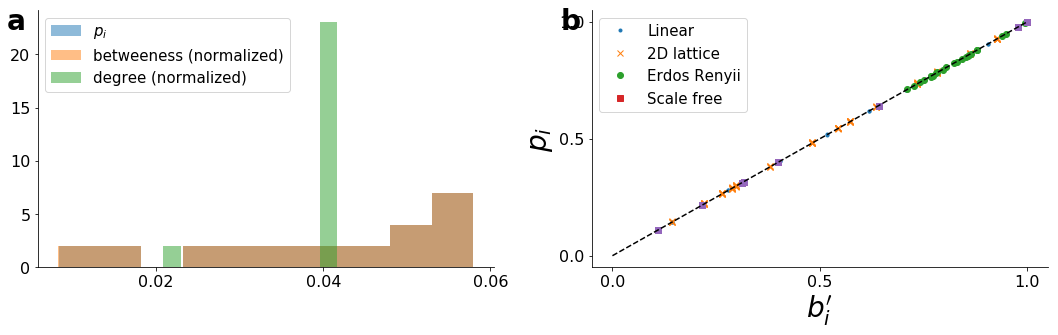

In [468]:
tick_size = 16
tick_sizey = 16
axis_size = 28
xaxis_size = 28
x_max = 100
label_size = 28
label_y_position = 1.01
ymax = 1.05
legend_size = 15
x_inset,y_inset = 0.9,0.9
num_trials = 100;
mbar = 1


#Path graph
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
bs = np.loadtxt('data/bs_path.txt')
ds = np.loadtxt('data/ds_path1.txt')
ps = np.loadtxt('data/ps_path.txt')
plt.hist(ps,alpha=0.5)
plt.hist(bs,alpha=0.5)
plt.hist(ds,alpha=0.5)
plt.rc('font', size=18) 
plt.xticks(fontsize=tick_size) 
plt.yticks(fontsize=tick_size)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.text(-0.025, label_y_position, 'a', transform=ax1.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
legend = ax1.legend(['$p_i$', 'betweeness (normalized)', 'degree (normalized)'],prop={'size': legend_size},
                    fancybox=True)
plt.locator_params(nbins=5)
plt.tight_layout()


#Ring graph
ax2 = plt.subplot(122)

#path
bs = np.loadtxt('data/bs_path.txt')
ps = np.loadtxt('data/ps_path.txt')
plt.plot(bs/max(bs),ps/max(ps),'.')

#2dlattice
bs = np.loadtxt('data/bs_2dlattice.txt')
ps = np.loadtxt('data/ps_2dlattice.txt')
plt.plot(bs/max(bs),ps/max(ps),'x')


#ER
bs = np.loadtxt('data/bs_ER.txt')
ps = np.loadtxt('data/ps_ER.txt')
plt.plot(bs/max(bs),ps/max(ps),'o')

#Scale free
bs = np.loadtxt('data/bs_SF.txt')
ps = np.loadtxt('data/ps_SF.txt')
plt.plot(bs/max(bs),ps/max(ps),'s')
plt.plot(bs/max(bs),ps/max(ps),'s')
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),'k--')


plt.xlabel('$b_i\'$', fontsize=xaxis_size)
plt.ylabel('$p_i$', fontsize=xaxis_size)
plt.rc('font', size=18) 
plt.xticks(fontsize=tick_size) 
plt.yticks(fontsize=tick_size)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.text(-0.025, label_y_position, 'b', transform=ax2.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
legend = ax2.legend(['Linear', '2D lattice','Erdos Renyii', 'Scale free'],prop={'size': legend_size},
                    fancybox=True)
plt.locator_params(nbins=4)
plt.tight_layout()


plt.savefig('figures/stationary_densities.png')

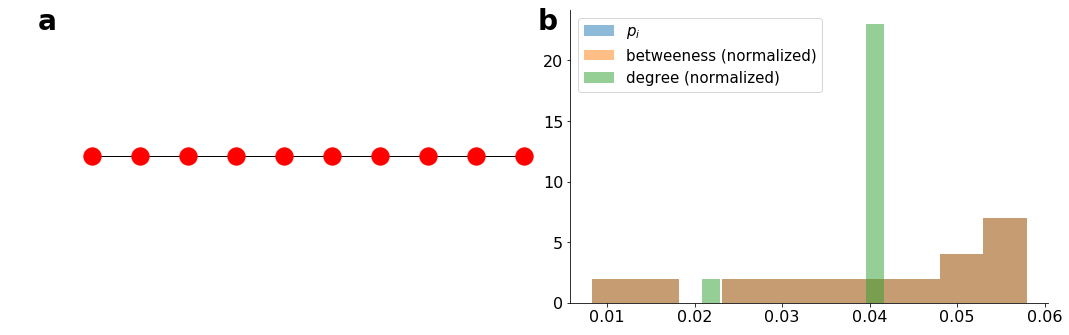

In [233]:
tick_size = 16
tick_sizey = 16
axis_size = 28
xaxis_size = 28
x_max = 100
label_size = 28
label_y_position = 1.01
ymax = 1.05
legend_size = 15
x_inset,y_inset = 0.9,0.9
num_trials = 100;
mbar = 1
import networkx as nx


#Path graph
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
num_nodes = 10
G = nx.path_graph(num_nodes)
pos = [(x,0) for x in range(0,10)]
nx.draw(G,pos=pos)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.text(-0.025, label_y_position, 'a', transform=ax1.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
plt.locator_params(nbins=5)
plt.tight_layout()

#Ring graph
ax2 = plt.subplot(122)
bs = np.loadtxt('data/bs_path.txt')
ds = np.loadtxt('data/ds_path1.txt')
ps = np.loadtxt('data/ps_path.txt')
plt.hist(ps,alpha=0.5)
plt.hist(bs,alpha=0.5)
plt.hist(ds,alpha=0.5)
plt.rc('font', size=18) 
plt.xticks(fontsize=tick_size) 
plt.yticks(fontsize=tick_size)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.text(-0.025, label_y_position, 'b', transform=ax2.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
legend = ax2.legend(['$p_i$', 'betweeness (normalized)', 'degree (normalized)'],prop={'size': legend_size},
                    fancybox=True)


plt.savefig('figures/stationary_densities_temp.png')

### Cover times ring and path

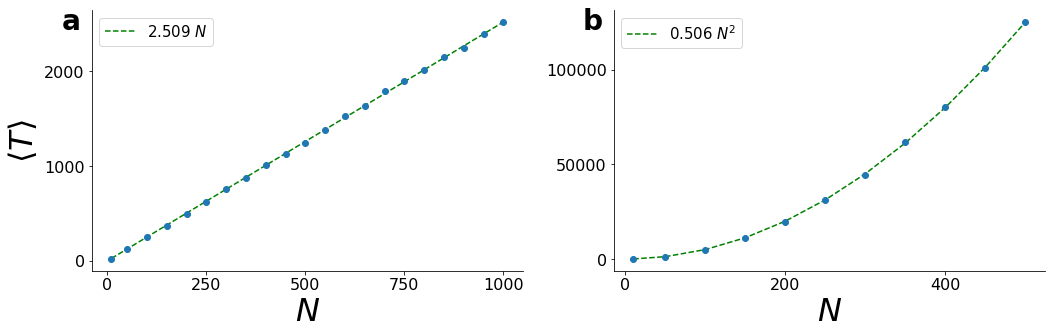

In [241]:
tick_size = 16
tick_sizey = 16
axis_size = 32
x_max = 100
label_size = 28
label_y_position = 1.01
ymax = 1.05
legend_size = 15
x_inset,y_inset = 0.9,0.9
num_trials = 100;
mbar = 1


from scipy.optimize import curve_fit
def func(N,b,c):
    return b*N**1

T_mean = np.loadtxt('data/mean_cover_td_ring.txt')
Ns = np.loadtxt('data/mean_cover_td_ring_Ns.txt')
T_std = np.loadtxt('data/mean_cover_td_ring_std.txt')


#Path graph
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
popt, pcov = curve_fit(func,Ns,T_mean)
plt.errorbar(Ns,T_mean,fmt='o')
plt.plot(Ns, func(Ns, *popt), 'g--')
plt.rc('font', size=18) 
plt.xticks(fontsize=tick_size) 
plt.yticks(fontsize=tick_size)
plt.xlabel('$N$', fontsize=axis_size)
plt.ylabel('$ \\langle T \\rangle $', fontsize=axis_size)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.text(-0.025, label_y_position, 'a', transform=ax1.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
legend = ax1.legend(['$ 2.509 \; N $'],prop={'size': legend_size},
                    fancybox=True)
plt.locator_params(nbins=5)
plt.tight_layout()


#Ring graph
ax2 = plt.subplot(122)
T_mean = np.loadtxt('data/mean_cover_td_path.txt')
Ns = np.loadtxt('data/mean_cover_td_path_Ns.txt')
T_std = np.loadtxt('data/mean_cover_td_path_std.txt')
def func(N,b,c):
    return b*N**2
popt, pcov = curve_fit(func,Ns,T_mean)
plt.errorbar(Ns,T_mean,fmt='o')
plt.plot(Ns, func(Ns, *popt), 'g--')
plt.xlabel('$N$', fontsize=axis_size)
plt.rc('font', size=18) 
plt.xticks(fontsize=tick_size) 
plt.yticks(fontsize=tick_size)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.text(-0.025, label_y_position, 'b', transform=ax2.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
legend = ax2.legend(['$ 0.506 \; N^2 $'],prop={'size': legend_size},
                    fancybox=True)
plt.locator_params(nbins=4)
plt.tight_layout()


plt.savefig('figures/cover_times_ring_path_graph.png')

Text(380,110000,'$0.51 \\; N^2$')

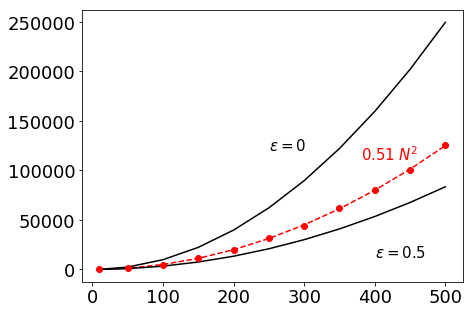

In [385]:
def rw_linear(n):
    if n % 2 == 0:
        return 1.25*(n-1)**2 -1/4
    else:
        return 1.25*(n-1)**2
    
def prw_linear(n,eps):
    term1 = (n-1)*(n-2)*(1.0 - eps)/(1 + eps)
    term2 = 2*(n-2) / (1 + eps)
    term3 = (2 + eps) / (1 + eps)
    return term1 + term2 + term3


def func(N,b,c):
    return b*N**2
T_mean = np.loadtxt('data/mean_cover_td_path.txt')
Ns = np.loadtxt('data/mean_cover_td_path_Ns.txt')
T_std = np.loadtxt('data/mean_cover_td_path_std.txt')


#Path graph
col = 'k'
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
popt, pcov = curve_fit(func,Ns,T_mean)
plt.errorbar(Ns,T_mean,fmt='ro')
plt.plot(Ns, func(Ns, *popt), 'r--')
plt.plot(Ns,[prw_linear(x,0.0) for x in Ns],col)
plt.plot(Ns,[prw_linear(x,0.5) for x in Ns],col)
plt.text(250,120000,'$\epsilon = 0$', fontsize=15)
plt.text(400,12000,'$\epsilon = 0.5$', fontsize=15)
plt.text(380,110000,'$0.51 \; N^2$', fontsize=15, color = 'red')

TypeError: text() takes at least 3 arguments (0 given)

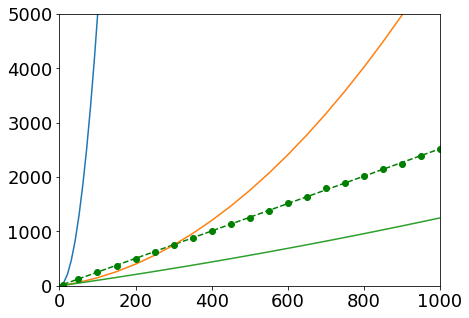

In [316]:
def rw_ring(n):
    return n*(n-1) / 2.0
    
def prw_ring(n,eps):
    term1 = (n**2)*(1.0 - eps)/(2*(1 + eps))
    term2 = n*(5*eps - 1)/ (2*(1 + eps))
    term3 = (-2*eps) / (1 + eps)
    return term1 + term2 + term3


T_mean = np.loadtxt('data/mean_cover_td_ring.txt')
Ns = np.loadtxt('data/mean_cover_td_ring_Ns.txt')
T_std = np.loadtxt('data/mean_cover_td_ring_std.txt')
def func(N,b,c):
    return b*N**1

#Path graph
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
popt, pcov = curve_fit(func,Ns,T_mean)
plt.errorbar(Ns,T_mean,fmt='go')
plt.plot(Ns, func(Ns, *popt), 'g--')
plt.plot(np.linspace(1,1000,100),[rw_ring(x) for x in np.linspace(1,1000,100)])
plt.plot(Ns,[prw_ring(x,0.98) for x in Ns])
#plt.plot(Ns,[prw_ring(x,0.99) for x in Ns])
plt.plot(Ns,[prw_ring(x,0.999) for x in Ns])
plt.ylim([0,0.5*10**4])
plt.xlim([0,1000])
#plt.legend(['taxi drive','$\epsilon = 0$', ''])
plt.text()

Text(780,600,'$\\epsilon = 0.999$')

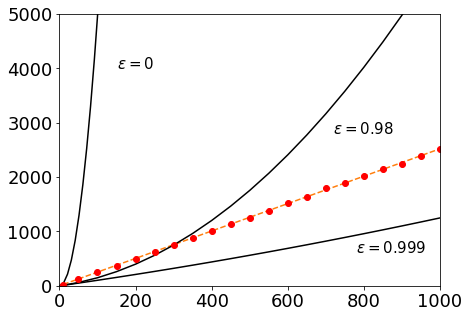

In [353]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
popt, pcov = curve_fit(func,Ns,T_mean)
plt.errorbar(Ns,T_mean,fmt='ro')
col = 'k'
plt.plot(Ns, func(Ns, *popt), 'C1--')
plt.plot(np.linspace(1,1000,100),[rw_ring(x) for x in np.linspace(1,1000,100)],col)
plt.plot(Ns,[prw_ring(x,0.98) for x in Ns], col)
plt.plot(Ns,[prw_ring(x,0.999) for x in Ns], col)
plt.ylim([0,0.5*10**4])
plt.xlim([0,1000])
plt.text(150,4000,'$\epsilon = 0$', fontsize=15)
plt.text(720,2800,'$\epsilon = 0.98$', fontsize=15)
plt.text(780,600,'$\epsilon = 0.999$', fontsize=15)
#legend = ax1.legend(['$ 2.509 \; N $'],prop={'size': legend_size},
#                    fancybox=True)

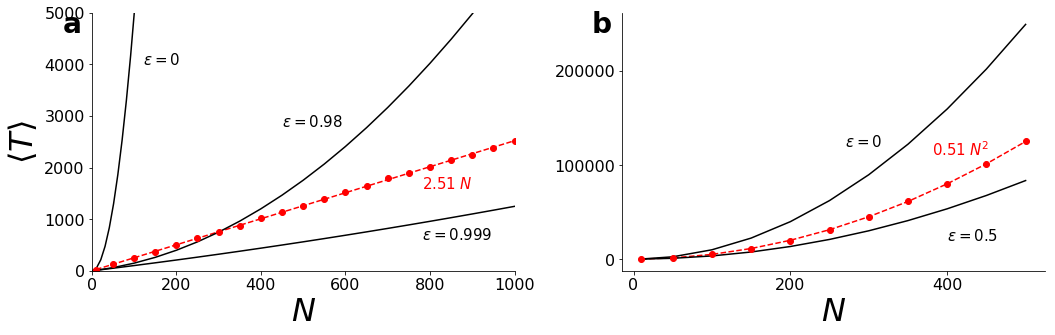

In [391]:
tick_size = 16
tick_sizey = 16
axis_size = 32
x_max = 100
label_size = 28
label_y_position = 1.01
ymax = 1.05
legend_size = 15
x_inset,y_inset = 0.9,0.9
num_trials = 100;
mbar = 1


def rw_ring(n):
    return n*(n-1) / 2.0
    
def prw_ring(n,eps):
    term1 = (n**2)*(1.0 - eps)/(2*(1 + eps))
    term2 = n*(5*eps - 1)/ (2*(1 + eps))
    term3 = (-2*eps) / (1 + eps)
    return term1 + term2 + term3


def rw_linear(n):
    if n % 2 == 0:
        return 1.25*(n-1)**2 -1/4
    else:
        return 1.25*(n-1)**2
    
def prw_linear(n,eps):
    term1 = (n-1)*(n-2)*(1.0 - eps)/(1 + eps)
    term2 = 2*(n-2) / (1 + eps)
    term3 = (2 + eps) / (1 + eps)
    return term1 + term2 + term3


from scipy.optimize import curve_fit
def func(N,b,c):
    return b*N**1

T_mean = np.loadtxt('data/mean_cover_td_ring.txt')
Ns = np.loadtxt('data/mean_cover_td_ring_Ns.txt')
T_std = np.loadtxt('data/mean_cover_td_ring_std.txt')


#Path graph
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
popt, pcov = curve_fit(func,Ns,T_mean)
plt.errorbar(Ns,T_mean,fmt='ro')
plt.plot(Ns, func(Ns, *popt), 'r--')
plt.plot(np.linspace(1,1000,100),[rw_ring(x) for x in np.linspace(1,1000,100)],col)
plt.plot(Ns,[prw_ring(x,0.98) for x in Ns], col)
plt.plot(Ns,[prw_ring(x,0.999) for x in Ns], col)
plt.ylim([0,0.5*10**4])
plt.xlim([0,1000])
plt.text(120,4000,'$\epsilon = 0$', fontsize=15)
plt.text(450,2800,'$\epsilon = 0.98$', fontsize=15)
plt.text(780,600,'$\epsilon = 0.999$', fontsize=15)
plt.text(780,1600,'$ 2.51 \; N $', fontsize=15, color='red')
plt.rc('font', size=18) 
plt.xticks(fontsize=tick_size) 
plt.yticks(fontsize=tick_size)
plt.xlabel('$N$', fontsize=axis_size)
plt.ylabel('$ \\langle T \\rangle $', fontsize=axis_size)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.text(-0.025, label_y_position, 'a', transform=ax1.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
#legend = ax1.legend(['$ 2.509 \; N $'],prop={'size': legend_size},
#                    fancybox=True)
plt.locator_params(nbins=5)
plt.tight_layout()


#Ring graph
ax2 = plt.subplot(122)
T_mean = np.loadtxt('data/mean_cover_td_path.txt')
Ns = np.loadtxt('data/mean_cover_td_path_Ns.txt')
T_std = np.loadtxt('data/mean_cover_td_path_std.txt')
def func(N,b,c):
    return b*N**2
popt, pcov = curve_fit(func,Ns,T_mean)
plt.errorbar(Ns,T_mean,fmt='ro')
plt.plot(Ns, func(Ns, *popt), 'r--')
plt.plot(Ns,[prw_linear(x,0.0) for x in Ns],col)
plt.plot(Ns,[prw_linear(x,0.5) for x in Ns],col)
plt.text(270,120000,'$\epsilon = 0$', fontsize=15)
plt.text(400,20000,'$\epsilon = 0.5$', fontsize=15)
plt.text(380,110000,'$0.51 \; N^2$', fontsize=15, color = 'red')
plt.xlabel('$N$', fontsize=axis_size)
plt.rc('font', size=18) 
plt.xticks(fontsize=tick_size) 
plt.yticks(fontsize=tick_size)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.text(-0.025, label_y_position, 'b', transform=ax2.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
#legend = ax2.legend(['$ 0.506 \; N^2 $'],prop={'size': legend_size},
#                    fancybox=True)
plt.locator_params(nbins=4)
plt.tight_layout()


plt.savefig('figures/cover_times_ring_path_graph_compare.png')

### Asymptotic covergence

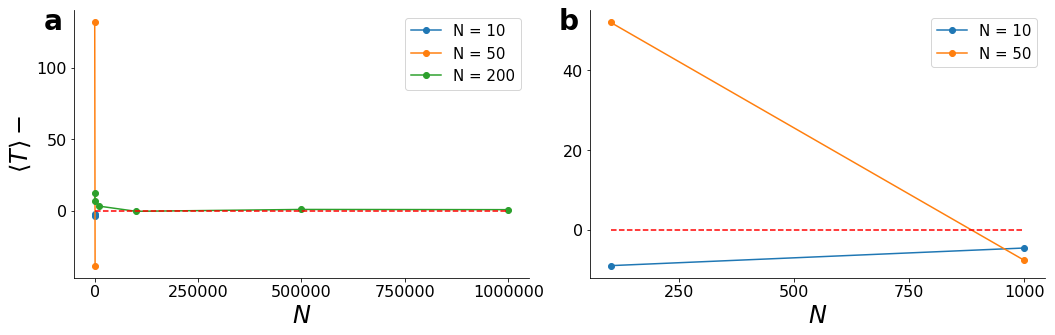

In [193]:
tick_size = 16
tick_sizey = 16
axis_size = 24
x_max = 100
label_size = 28
label_y_position = 1.01
ymax = 1.05
legend_size = 15
x_inset,y_inset = 0.9,0.9
num_trials = 100;
mbar = 1



#Path graph
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
Ns = [10,50,200]
for N in Ns:
    delta = np.loadtxt('data/converge_delta_ring_graph_N_' + str(N) + '.txt')
    Ns1 = np.loadtxt('data/converge_num_trials_ring_graph_N_' + str(N) + '.txt')
    plt.plot(Ns1,delta,'o-')
plt.plot(Ns1, [0 for i in Ns1], 'r--')
plt.rc('font', size=18) 
plt.xticks(fontsize=tick_size) 
plt.yticks(fontsize=tick_size)
plt.xlabel('$N$', fontsize=axis_size)
plt.ylabel('$ \\langle T \\rangle - \frac{5}{2} N $', fontsize=axis_size)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.text(-0.025, label_y_position, 'a', transform=ax1.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
legend = ax1.legend(['N = ' + str(n) for n in Ns],prop={'size': legend_size},
                    fancybox=True)
plt.locator_params(nbins=5)
plt.tight_layout()


#Ring graph
ax2 = plt.subplot(122)
Ns = [10,50]
for N in Ns:
    delta = np.loadtxt('data/converge_delta_path_graph_N_' + str(N) + '.txt')
    Ns1 = np.loadtxt('data/converge_num_trials_path_graph_N_' + str(N) + '.txt')
    plt.plot(Ns1,delta,'o-')
plt.plot(Ns1, [0 for i in Ns1], 'r--')
plt.xlabel('$N$', fontsize=axis_size)
plt.rc('font', size=18) 
plt.xticks(fontsize=tick_size) 
plt.yticks(fontsize=tick_size)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.text(-0.025, label_y_position, 'b', transform=ax2.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
legend = ax2.legend(['N = ' + str(n) for n in Ns],prop={'size': legend_size},
                    fancybox=True)
plt.locator_params(nbins=4)
plt.tight_layout()


#plt.savefig('figures/cover_times_ring_path_graph_convergence.png')

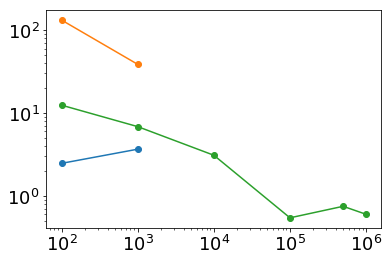

In [190]:
for N in [10,50,200]:
    delta = np.loadtxt('data/converge_delta_ring_graph_N_' + str(N) + '.txt')
    Ns = np.loadtxt('data/converge_num_trials_ring_graph_N_' + str(N) + '.txt')
    plt.loglog(Ns,np.abs(delta),'o-')
plt.loglog(Ns, [0 for i in Ns], 'r--')

### Cover times regular graphs

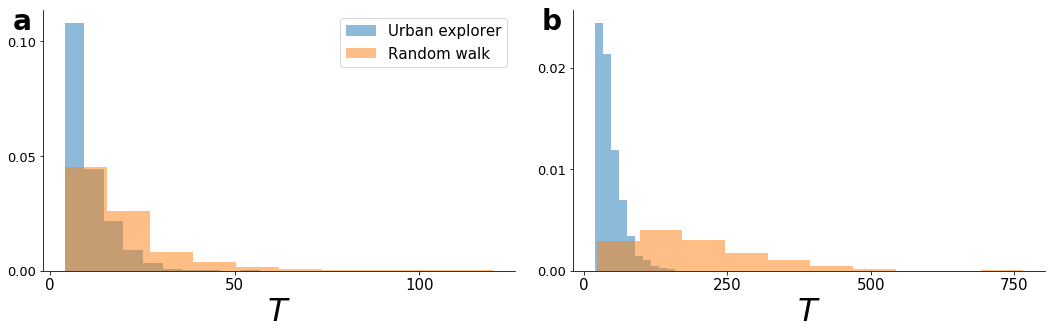

In [5]:
tick_size = 16
tick_sizey = 16
axis_size = 32
xaxis_size = 32
x_max = 100
label_size = 28
label_y_position = 1.01
ymax = 1.05
legend_size = 15
x_inset,y_inset = 0.9,0.9
num_trials = 100;
mbar = 1


#Path graph
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ue = np.loadtxt('data/covertimes_path_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_path_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.rc('font', size=18) 
plt.xticks(fontsize=tick_size-1) 
plt.yticks(fontsize=tick_size-3)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.text(-0.025, label_y_position, 'a', transform=ax1.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
legend = ax1.legend(['Urban explorer', 'Random walk'],prop={'size': legend_size},
                    fancybox=True)
plt.locator_params(nbins=4)
plt.tight_layout()


#Ring graph
ax2 = plt.subplot(122)
ue = np.loadtxt('data/covertimes_ring_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_ring_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.rc('font', size=18) 
plt.xticks(fontsize=tick_size-1) 
plt.yticks(fontsize=tick_size-3)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.text(-0.025, label_y_position, 'b', transform=ax2.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
plt.locator_params(nbins=4)
plt.tight_layout()


#plt.savefig('figures/cover_times.png')

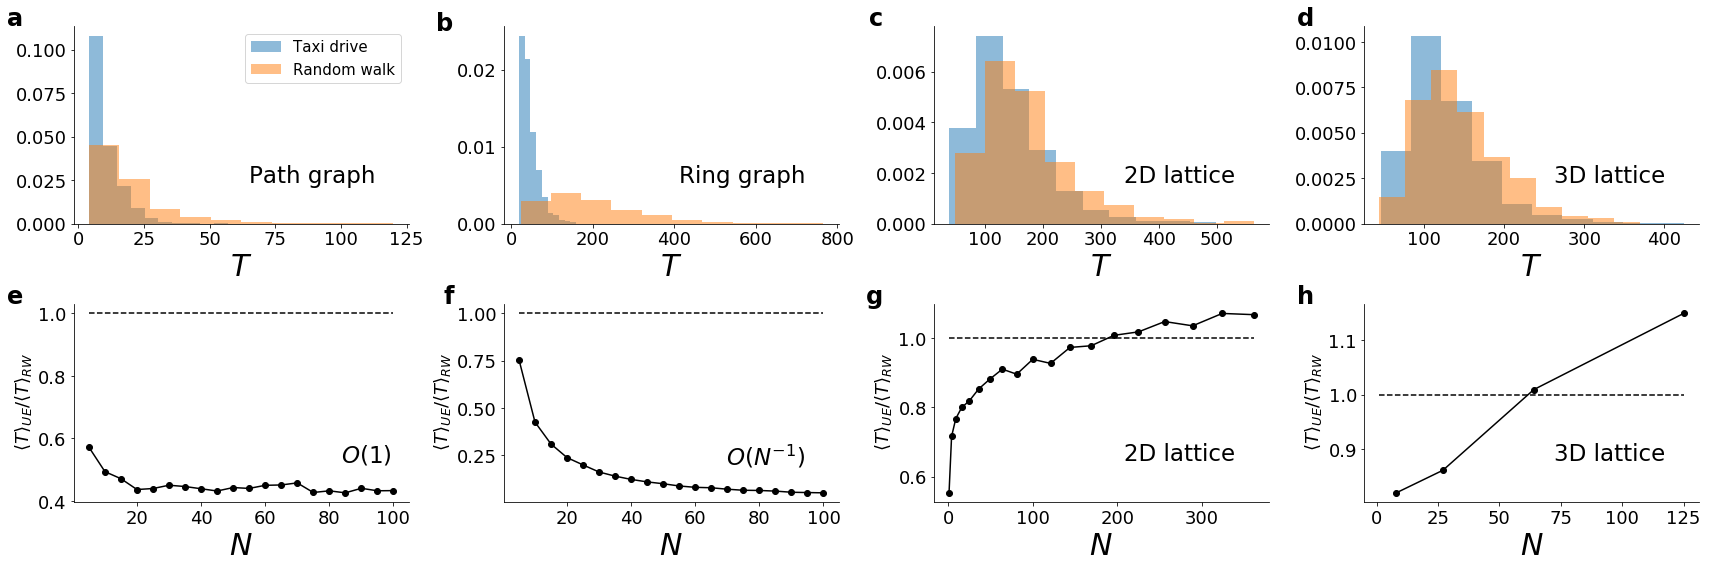

In [6]:
from matplotlib.ticker import FormatStrFormatter
plt.figure(figsize=(24,8))
#plt.legend(['data','theory'])


tick_size = 18
tick_sizey = 20
axis_size = 30
xaxis_size = 30
x_max = 100
label_size = 24
label_x_position_left = -0.15
label_x_position_right = -0.15
label_y_position = 1.10
ymax = 1
inset_size = 23
num_trials = 100
mbar = 1
inset_ypos = 0.3


#Path graph
ax1 = plt.subplot(241)
name = 'yangpu'
ue = np.loadtxt('data/covertimes_path_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_path_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.text(label_x_position_left, label_y_position, 'a', transform=ax1.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax1.text(0.9, inset_ypos, 'Path graph', transform=ax1.transAxes,
      fontsize=inset_size, va='top', ha='right')
legend = ax1.legend(['Taxi drive', 'Random walk'],prop={'size': legend_size},
                    fancybox=True)


#Line graph
ax2 = plt.subplot(242)
ue = np.loadtxt('data/covertimes_ring_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_ring_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.text(label_x_position_right, 1.075, 'b', transform=ax2.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax2.text(0.9, inset_ypos, 'Ring graph', transform=ax2.transAxes,
      fontsize=inset_size, va='top', ha='right')



#2D lattice
ax3 = plt.subplot(243)
ue = np.loadtxt('data/covertimes_2dlattice_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_2dlattice_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax3.spines["top"].set_visible(False)  
ax3.spines["right"].set_visible(False)
ax3.text(label_x_position_left,label_y_position, 'c', transform=ax3.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax3.text(0.9, inset_ypos, '2D lattice', transform=ax3.transAxes,
      fontsize=inset_size, va='top', ha='right')


#3D lattice
ax4 = plt.subplot(244)
ue = np.loadtxt('data/covertimes_3dlattice_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_3dlattice_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax4.spines["top"].set_visible(False)  
ax4.spines["right"].set_visible(False)
ax4.text(label_x_position_right, label_y_position, 'd', transform=ax4.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax4.text(0.9, inset_ypos, '3D lattice', transform=ax4.transAxes,
      fontsize=inset_size, va='top', ha='right')



#Path
ax5 = plt.subplot(245)
meanTs = np.loadtxt('data/mean_covertime_ratio_path.txt')
Ns = np.loadtxt('data/mean_covertime_ratio_ring_Ns.txt')
plt.plot(Ns,meanTs,'ko-')
plt.plot(Ns, [1 for n in Ns], 'k--')
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax5.spines["top"].set_visible(False)  
ax5.spines["right"].set_visible(False)
ax5.text(label_x_position_left, label_y_position, 'e', transform=ax5.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax5.text(0.95, inset_ypos, '$O(1)$', transform=ax5.transAxes,
      fontsize=inset_size, va='top', ha='right')


#Ring
ax6 = plt.subplot(246)
meanTs = np.loadtxt('data/mean_covertime_ratio_ring.txt')
Ns = np.loadtxt('data/mean_covertime_ratio_ring_Ns.txt')
plt.plot(Ns,meanTs,'ko-')
plt.plot(Ns, [1 for n in Ns], 'k--')
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax6.spines["top"].set_visible(False)  
ax6.spines["right"].set_visible(False)
ax6.text(label_x_position_right, label_y_position, 'f', transform=ax6.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax6.text(0.9, inset_ypos, '$O(N^{-1})$', transform=ax6.transAxes,
      fontsize=inset_size, va='top', ha='right')


#2D lattice
ax7 = plt.subplot(247)
meanTs = np.loadtxt('data/mean_covertime_ratio_2dlattice.txt')
Ns = np.loadtxt('data/mean_covertime_ratio_2dlattice_Ns.txt')
plt.plot(Ns**2,meanTs,'ko-')     #I went by the width of the grid
plt.plot(Ns**2, [1 for n in Ns], 'k--')
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax7.spines["top"].set_visible(False)  
ax7.spines["right"].set_visible(False)
ax7.text(label_x_position_left, label_y_position, 'g', transform=ax7.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax7.text(0.9, inset_ypos, '2D lattice', transform=ax7.transAxes,
      fontsize=inset_size, va='top', ha='right')


#3D lattice
ax8 = plt.subplot(248)
meanTs = np.loadtxt('data/mean_covertime_ratio_3dlattice.txt')
Ns = np.loadtxt('data/mean_covertime_ratio_3dlattice_Ns.txt')
plt.plot(Ns**3,meanTs,'ko-')
plt.plot(Ns**3, [1 for n in Ns], 'k--')
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
ax8.spines["top"].set_visible(False)  
ax8.spines["right"].set_visible(False)
ax8.text(label_x_position_right, label_y_position, 'h', transform=ax8.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax8.text(0.9, inset_ypos, '3D lattice', transform=ax8.transAxes,
      fontsize=inset_size, va='top', ha='right')



plt.tight_layout()
plt.savefig('figures/cover_times_regular_graphs.png')

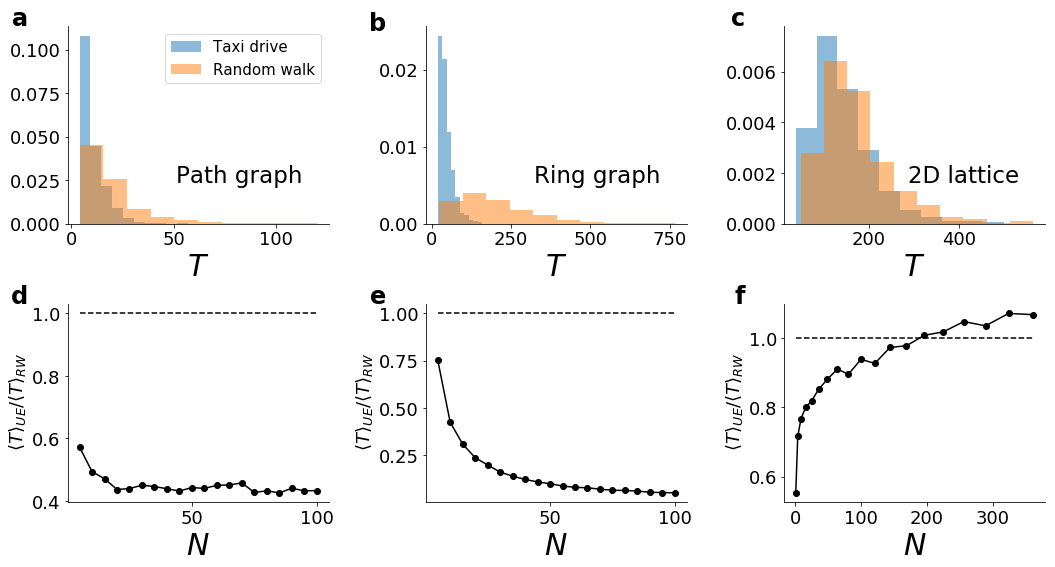

In [13]:
from matplotlib.ticker import FormatStrFormatter
plt.figure(figsize=(15,8))
#plt.legend(['data','theory'])


tick_size = 18
tick_sizey = 20
axis_size = 30
xaxis_size = 30
x_max = 100
label_size = 24
label_x_position_left = -0.15
label_x_position_right = -0.15
label_y_position = 1.10
ymax = 1
inset_size = 23
num_trials = 100
mbar = 1
inset_ypos = 0.3


#Path graph
ax1 = plt.subplot(231)
name = 'yangpu'
ue = np.loadtxt('data/covertimes_path_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_path_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.text(label_x_position_left, label_y_position, 'a', transform=ax1.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax1.text(0.9, inset_ypos, 'Path graph', transform=ax1.transAxes,
      fontsize=inset_size, va='top', ha='right')
legend = ax1.legend(['Taxi drive', 'Random walk'],prop={'size': legend_size},
                    fancybox=True)


#Line graph
ax2 = plt.subplot(232)
ue = np.loadtxt('data/covertimes_ring_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_ring_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.text(label_x_position_right, 1.075, 'b', transform=ax2.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax2.text(0.9, inset_ypos, 'Ring graph', transform=ax2.transAxes,
      fontsize=inset_size, va='top', ha='right')



#2D lattice
ax3 = plt.subplot(233)
ue = np.loadtxt('data/covertimes_2dlattice_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_2dlattice_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax3.spines["top"].set_visible(False)  
ax3.spines["right"].set_visible(False)
ax3.text(label_x_position_left,label_y_position, 'c', transform=ax3.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax3.text(0.9, inset_ypos, '2D lattice', transform=ax3.transAxes,
      fontsize=inset_size, va='top', ha='right')




#Path
ax4 = plt.subplot(234)
meanTs = np.loadtxt('data/mean_covertime_ratio_path.txt')
Ns = np.loadtxt('data/mean_covertime_ratio_ring_Ns.txt')
plt.plot(Ns,meanTs,'ko-')
plt.plot(Ns, [1 for n in Ns], 'k--')
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax4.spines["top"].set_visible(False)  
ax4.spines["right"].set_visible(False)
ax4.text(label_x_position_left, label_y_position, 'd', transform=ax4.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
#ax4.text(0.95, inset_ypos, '$O(1)$', transform=ax5.transAxes,
#      fontsize=inset_size, va='top', ha='right')


#Ring
ax5 = plt.subplot(235)
meanTs = np.loadtxt('data/mean_covertime_ratio_ring.txt')
Ns = np.loadtxt('data/mean_covertime_ratio_ring_Ns.txt')
plt.plot(Ns,meanTs,'ko-')
plt.plot(Ns, [1 for n in Ns], 'k--')
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax5.spines["top"].set_visible(False)  
ax5.spines["right"].set_visible(False)
ax5.text(label_x_position_right, label_y_position, 'e', transform=ax5.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
#ax5.text(0.9, inset_ypos, '$O(N^{-1})$', transform=ax6.transAxes,
#      fontsize=inset_size, va='top', ha='right')


#2D lattice
ax6 = plt.subplot(236)
meanTs = np.loadtxt('data/mean_covertime_ratio_2dlattice.txt')
Ns = np.loadtxt('data/mean_covertime_ratio_2dlattice_Ns.txt')
plt.plot(Ns**2,meanTs,'ko-')     #I went by the width of the grid
plt.plot(Ns**2, [1 for n in Ns], 'k--')
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax6.spines["top"].set_visible(False)  
ax6.spines["right"].set_visible(False)
ax6.text(label_x_position_left, label_y_position, 'f', transform=ax6.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
#ax6.text(0.9, inset_ypos, '2D lattice', transform=ax7.transAxes,
#      fontsize=inset_size, va='top', ha='right')




plt.tight_layout()
plt.savefig('figures/cover_times_regular_graphs_six.png')

### Cover times random graphs

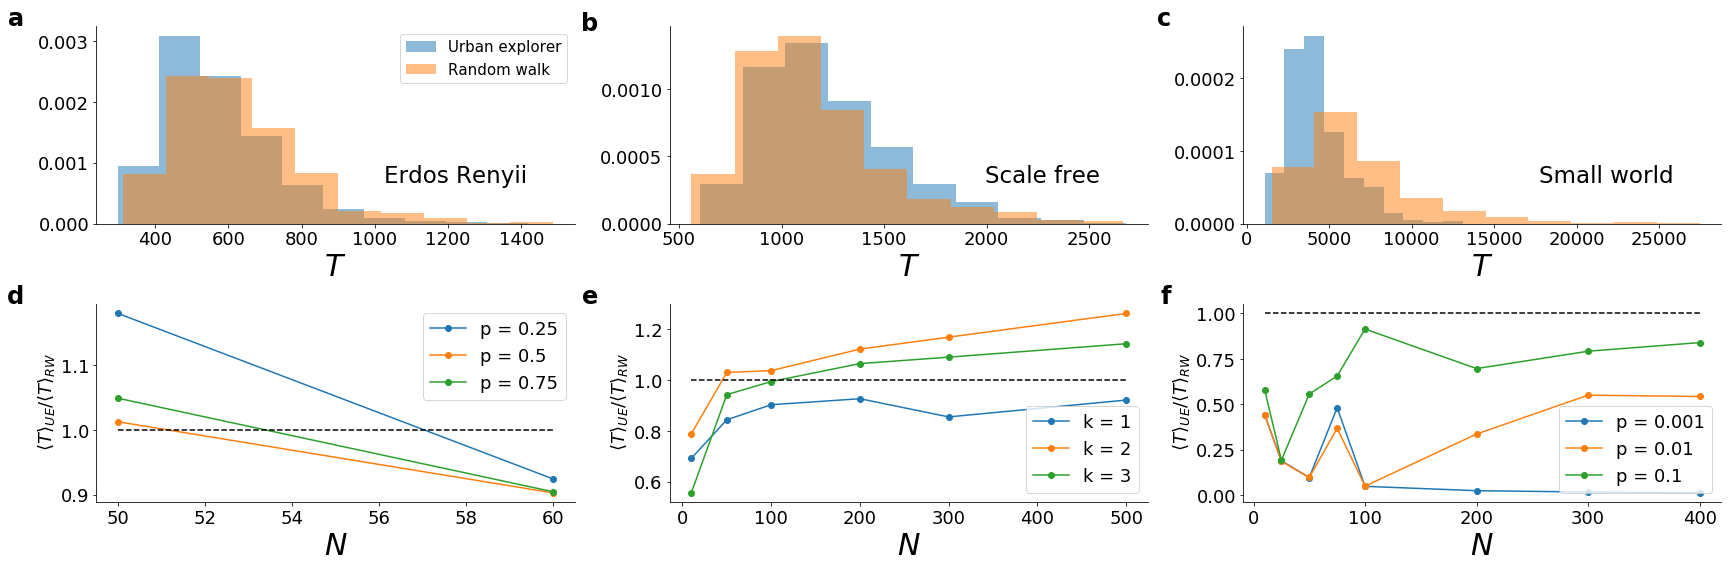

In [397]:
from matplotlib.ticker import FormatStrFormatter
plt.figure(figsize=(24,8))
#plt.legend(['data','theory'])


tick_size = 18
tick_sizey = 20
axis_size = 30
xaxis_size = 30
x_max = 100
label_size = 24
label_x_position_left = -0.15
label_x_position_right = -0.15
label_y_position = 1.10
ymax = 1
inset_size = 23
num_trials = 100
mbar = 1
inset_ypos = 0.3


#ER graph
ax1 = plt.subplot(231)
ue = np.loadtxt('data/covertimes_ER_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_ER_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.text(label_x_position_left, label_y_position, 'a', transform=ax1.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax1.text(0.9, inset_ypos, 'Erdos Renyii', transform=ax1.transAxes,
      fontsize=inset_size, va='top', ha='right')
legend = ax1.legend(['Urban explorer', 'Random walk'],prop={'size': legend_size},
                    fancybox=True)


#SF graph
ax2 = plt.subplot(232)
ue = np.loadtxt('data/covertimes_SF_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_SF_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.text(label_x_position_right, 1.075, 'b', transform=ax2.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax2.text(0.9, inset_ypos, 'Scale free', transform=ax2.transAxes,
      fontsize=inset_size, va='top', ha='right')



#SW
ax3 = plt.subplot(233)
ue = np.loadtxt('data/covertimes_SW_urban_explorer.txt')
rw = np.loadtxt('data/covertimes_SW_random_walker.txt')
plt.hist(ue,alpha=0.5,normed=True)
plt.hist(rw,alpha=0.5,normed=True)
plt.xlabel('$T$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax3.spines["top"].set_visible(False)  
ax3.spines["right"].set_visible(False)
ax3.text(label_x_position_left,label_y_position, 'c', transform=ax3.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax3.text(0.9, inset_ypos, 'Small world', transform=ax3.transAxes,
      fontsize=inset_size, va='top', ha='right')


#ER
ax4 = plt.subplot(234)
ps = [0.25,0.5,0.75]
for p in ps:
    meanTs = np.loadtxt('data/mean_cover_time_ratio_ER_p_' + str(p)+'.txt')
    Ns = np.loadtxt('data/mean_covertime_ratio_ER_Ns.txt')
    plt.plot(Ns,meanTs,'o-')
plt.plot(Ns, [1 for n in Ns], 'k--')
plt.legend(['p = ' + str(p) for p in ps ])
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax4.spines["top"].set_visible(False)  
ax4.spines["right"].set_visible(False)
ax4.text(label_x_position_left, label_y_position, 'd', transform=ax4.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
#ax4.text(0.95, inset_ypos, '$O(1)$', transform=ax5.transAxes,
#      fontsize=inset_size, va='top', ha='right')



#SF
ax5 = plt.subplot(235)
ks = [1,2,3]
for k in ks:
    meanTs = np.loadtxt('data/mean_cover_time_ratio_SF_k_' + str(k)+'.txt')
    Ns = np.loadtxt('data/mean_cover_time_ratio_SF_Ns.txt')
    plt.plot(Ns,meanTs,'o-')
plt.plot(Ns, [1 for n in Ns], 'k--')
plt.legend(['k = ' + str(k) for k in ks])
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax5.spines["top"].set_visible(False)  
ax5.spines["right"].set_visible(False)
ax5.text(label_x_position_left, label_y_position, 'e', transform=ax5.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
#ax5.text(0.95, inset_ypos, '$O(1)$', transform=ax5.transAxes,
#      fontsize=inset_size, va='top', ha='right')


#SW
ax6 = plt.subplot(236)
ps = [0.001,0.01,0.1]
for p in ps:
    meanTs = np.loadtxt('data/mean_cover_time_ratio_SW_p_' + str(p)+'.txt')
    Ns = np.loadtxt('data/mean_cover_time_ratio_SW_Ns.txt')
    plt.plot(Ns,meanTs,'o-')
plt.plot(Ns, [1 for n in Ns], 'k--')
plt.legend(['p = ' + str(p) for p in ps])
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax6.spines["top"].set_visible(False)  
ax6.spines["right"].set_visible(False)
ax6.text(label_x_position_right, label_y_position, 'f', transform=ax6.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
#ax6.text(0.9, inset_ypos, '$O(N^{-1})$', transform=ax6.transAxes,
#      fontsize=inset_size, va='top', ha='right')



plt.tight_layout()
plt.savefig('figures/cover_times_random_graphs.png')

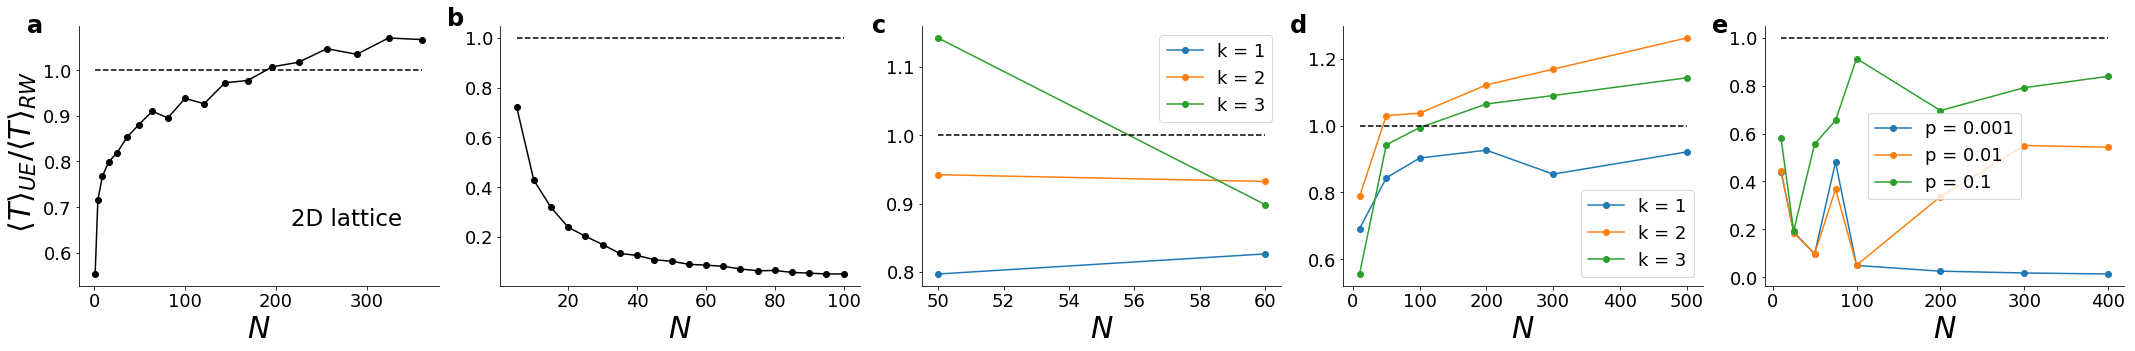

In [418]:
from matplotlib.ticker import FormatStrFormatter
plt.figure(figsize=(30,5))
#plt.legend(['data','theory'])

tick_size = 18
tick_sizey = 20
axis_size = 30
xaxis_size = 30
x_max = 100
label_size = 24
label_x_position_left = -0.10
label_x_position_right = -0.10
label_y_position = 1.05
ymax = 1
inset_size = 23
num_trials = 100
mbar = 1
inset_ypos = 0.3


#2D lattice
ax1 = plt.subplot(151)
meanTs = np.loadtxt('data/mean_covertime_ratio_2dlattice.txt')
Ns = np.loadtxt('data/mean_covertime_ratio_2dlattice_Ns.txt')
plt.plot(Ns**2,meanTs,'ko-')     #I went by the width of the grid
plt.plot(Ns**2, [1 for n in Ns], 'k--')
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $', fontsize=axis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.text(label_x_position_left, label_y_position, 'a', transform=ax1.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax1.text(0.9, inset_ypos, '2D lattice', transform=ax1.transAxes,
      fontsize=inset_size, va='top', ha='right')


#Barbell
ax2 = plt.subplot(152)
meanTs = np.loadtxt('data/mean_covertime_ratio_barbell.txt')
Ns = np.loadtxt('data/mean_covertime_ratio_barbell_Ns.txt')
plt.plot(Ns,meanTs,'ko-')
plt.plot(Ns, [1 for n in Ns], 'k--')
plt.xlabel('$N$', fontsize=xaxis_size)
#plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.text(label_x_position_right, 1.075, 'b', transform=ax2.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
#ax2.text(0.9, inset_ypos, 'Scale free', transform=ax2.transAxes,
#      fontsize=inset_size, va='top', ha='right')



#ER
ax3 = plt.subplot(153)
ps = [0.25,0.5,0.75]
for p in ps:
    meanTs = np.loadtxt('data/mean_cover_time_ratio_ER_p_' + str(p)+'.txt')
    Ns = np.loadtxt('data/mean_covertime_ratio_ER_Ns.txt')
    plt.plot(Ns,meanTs,'o-')
plt.legend(['p = ' + str(p) for p in ps ])
plt.plot(Ns, [1 for n in Ns], 'k--')
plt.legend(['k = ' + str(k) for k in ks])
plt.xlabel('$N$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax3.spines["top"].set_visible(False)  
ax3.spines["right"].set_visible(False)
ax3.text(label_x_position_left,label_y_position, 'c', transform=ax3.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
#ax3.text(0.9, inset_ypos, 'Small world', transform=ax3.transAxes,
#      fontsize=inset_size, va='top', ha='right')


#SF
ax4 = plt.subplot(154)
for k in ks:
    meanTs = np.loadtxt('data/mean_cover_time_ratio_SF_k_' + str(k)+'.txt')
    Ns = np.loadtxt('data/mean_cover_time_ratio_SF_Ns.txt')
    plt.plot(Ns,meanTs,'o-')
plt.plot(Ns, [1 for n in Ns], 'k--')
plt.legend(['k = ' + str(k) for k in ks])
plt.xlabel('$N$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax4.spines["top"].set_visible(False)  
ax4.spines["right"].set_visible(False)
ax4.text(label_x_position_left, label_y_position, 'd', transform=ax4.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')



#SW
ax5 = plt.subplot(155)
ps = [0.001,0.01,0.1]
for p in ps:
    meanTs = np.loadtxt('data/mean_cover_time_ratio_SW_p_' + str(p)+'.txt')
    Ns = np.loadtxt('data/mean_cover_time_ratio_SW_Ns.txt')
    plt.plot(Ns,meanTs,'o-')
plt.plot(Ns, [1 for n in Ns], 'k--')
plt.legend(['p = ' + str(p) for p in ps])
plt.xlabel('$N$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax5.spines["top"].set_visible(False)  
ax5.spines["right"].set_visible(False)
ax5.text(label_x_position_left, label_y_position, 'e', transform=ax5.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
#ax5.text(0.95, inset_ypos, '$O(1)$', transform=ax5.transAxes,
#      fontsize=inset_size, va='top', ha='right')


plt.tight_layout()
plt.savefig('figures/cover_times_random_graphs.png')

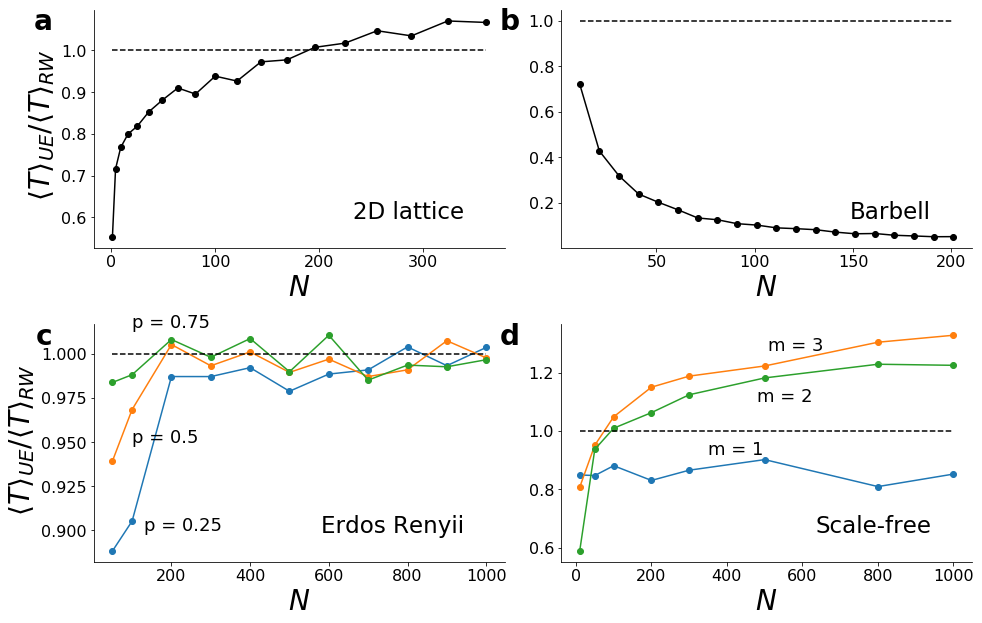

In [476]:
from matplotlib.ticker import FormatStrFormatter
plt.figure(figsize=(14,9))
#plt.legend(['data','theory'])

tick_size = 16
tick_sizey = 16
axis_size = 28
xaxis_size = 28
x_max = 100
label_size = 28
label_y_position = 1.01
ymax = 1.05
legend_size = 15
x_inset,y_inset = 0.9,0.9
num_trials = 100;
mbar = 1
inset_ypos = 0.2


#2D lattice
ax1 = plt.subplot(221)
meanTs = np.loadtxt('data/mean_covertime_ratio_2dlattice.txt')
Ns = np.loadtxt('data/mean_covertime_ratio_2dlattice_Ns.txt')
plt.plot(Ns**2,meanTs,'ko-')     #I went by the width of the grid
plt.plot(Ns**2, [1 for n in Ns], 'k--')
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $', fontsize=axis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.text(label_x_position_left, label_y_position, 'a', transform=ax1.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax1.text(0.9, inset_ypos, '2D lattice', transform=ax1.transAxes,
      fontsize=inset_size, va='top', ha='right')


#Barbell
ax2 = plt.subplot(222)
meanTs = np.loadtxt('data/mean_covertime_ratio_barbell.txt')
Ns = np.loadtxt('data/mean_covertime_ratio_barbell_Ns.txt')
plt.plot([2*N +1 for N in Ns],meanTs,'ko-')
plt.plot([2*N +1 for N in Ns], [1 for n in Ns], 'k--')
plt.xlabel('$N$', fontsize=xaxis_size)
#plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $ ')
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.text(label_x_position_right, label_y_position, 'b', transform=ax2.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax2.text(0.9, inset_ypos, 'Barbell', transform=ax2.transAxes,
      fontsize=inset_size, va='top', ha='right')



#ER
ax3 = plt.subplot(223)
ps = [0.25,0.5,0.75]
for p in ps:
    meanTs = np.loadtxt('data/mean_cover_time_ratio_ER_p_' + str(p)+'.txt')
    Ns = np.loadtxt('data/mean_covertime_ratio_ER_Ns.txt')
    plt.plot(Ns,meanTs,'o-')
#plt.legend(['p = ' + str(p) for p in ps ])
plt.plot(Ns, [1 for n in Ns], 'k--')
plt.xlabel('$N$', fontsize=xaxis_size)
plt.ylabel(' $ \\langle T \\rangle_{UE} / \\langle T \\rangle_{RW} $', fontsize=axis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax3.spines["top"].set_visible(False)  
ax3.spines["right"].set_visible(False)
ax3.text(label_x_position_left,label_y_position, 'c', transform=ax3.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax3.text(0.9, inset_ypos, 'Erdos Renyii', transform=ax3.transAxes,
      fontsize=inset_size, va='top', ha='right')
ax3.text(130,0.90, 'p = 0.25')
ax3.text(100,0.95, 'p = 0.5')
ax3.text(100, 1.015, 'p = 0.75')


#SF
ax4 = plt.subplot(224)
for k in ks:
    meanTs = np.loadtxt('data/mean_cover_time_ratio_SF_k_' + str(k)+'.txt')
    Ns = np.loadtxt('data/mean_cover_time_ratio_SF_Ns.txt')
    plt.plot(Ns,meanTs,'o-')
plt.plot(Ns, [1 for n in Ns], 'k--')
plt.xlabel('$N$', fontsize=xaxis_size)
plt.xticks(fontsize=tick_size)  
plt.yticks(fontsize=tick_size)
ax4.spines["top"].set_visible(False)  
ax4.spines["right"].set_visible(False)
ax4.text(label_x_position_left, label_y_position, 'd', transform=ax4.transAxes,
      fontsize=label_size, fontweight='bold', va='top', ha='right')
ax4.text(0.9, inset_ypos, 'Scale-free', transform=ax4.transAxes,
      fontsize=inset_size, va='top', ha='right')
ax4.text(350,0.92, 'm = 1')
ax4.text(480,1.1, 'm = 2')
ax4.text(510, 1.275, 'm = 3')


plt.tight_layout()
plt.savefig('figures/cover_times_random_graphs1.png')

### m-cover time

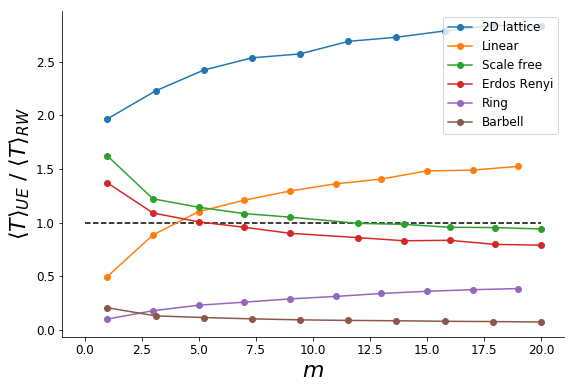

In [467]:
#Load data
meanTratioER = np.loadtxt('data/meanTratio_versus_mbar_ER.txt')
nsER = np.loadtxt('data/maxTration_ns.txt')

meanTratioSF = np.loadtxt('data/meanTratio_versus_mbar_SF.txt')
nsSF = np.loadtxt('data/maxTration_ns_SF.txt')

meanTratioBB = np.loadtxt('data/meanTratio_versus_mbar_BB.txt')
nsBB = np.loadtxt('data/maxTration_ns_BB.txt')

meanTratioGG = np.loadtxt('data/meanTratio_versus_mbar_GG.txt')
nsGG = np.loadtxt('data/maxTration_ns_GG.txt')

meanTratioPG = np.loadtxt('data/meanTratio_versus_mbar_PG.txt')
nsPG = np.loadtxt('data/maxTration_ns_PG.txt')

meanTratioRG = np.loadtxt('data/meanTratio_versus_mbar_RG.txt')
nsRG = np.loadtxt('data/maxTration_ns_RG.txt')

tick_size=12
axis_size = 22
legend_size = 12

#Histogram
plt.figure(figsize=(9,6))
ax1 = plt.subplot(111)
plt.plot(nsBB,meanTratioGG,'o-')
plt.plot(nsPG,meanTratioPG,'o-')
plt.plot(nsSF,meanTratioSF,'o-')
plt.plot(nsER,meanTratioER,'o-')
plt.plot(nsRG,meanTratioRG,'o-')
plt.plot(nsBB,meanTratioBB,'o-')
plt.xlabel('$m$',fontsize=axis_size)
plt.ylabel('$\\langle T \\rangle_{UE}$ / $\\langle T \\rangle_{RW}$',fontsize=axis_size)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
#ax1.text(-0.025, label_y_position, 'a', transform=ax1.transAxes,
#      fontsize=label_size, fontweight='bold', va='top', ha='right')
legend = ax1.legend(['2D lattice','Linear','Scale free','Erdos Renyi','Ring','Barbell'],\
                    prop={'size': legend_size},fancybox=True, loc = 1)
plt.setp(legend.get_title(),fontsize=18)
plt.hlines(1,0,max(nsER),linestyle='dashed')


plt.savefig('figures/meanTratio_versus_mbar_all_graphs_new.png')

### Roughwork